In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

plt.style.use('ggplot')
%matplotlib inline

In [2]:
def sn_draw(k):
    return np.random.normal(0,1,k)

def dm_chi_sq_draw(k):
    z = sn_draw(k)
    return z * z - np.ones(k)

In [3]:
def OLS(Y, X):
    Y = np.array(Y)
    X = np.c_[np.ones(np.shape(Y)),np.array(X)]
    
    cov = np.dot(np.transpose(X),Y)
    var = np.dot(np.transpose(X),X)
    
    return np.dot(np.linalg.inv(var), cov)

Mean of Beta: 0.998489138651
S.D. of Beta: 0.244826615074
Finite Sample:: 0.214314507551
Asymptotic 0.22360679775
*********

Mean of Beta: 1.00006997459
S.D. of Beta: 0.100255357441
Finite Sample:: 0.0910920078733
Asymptotic 0.1
*********

Mean of Beta: 0.99985491554
S.D. of Beta: 0.0100999635998
Finite Sample:: 0.0100581224482
Asymptotic 0.01
*********



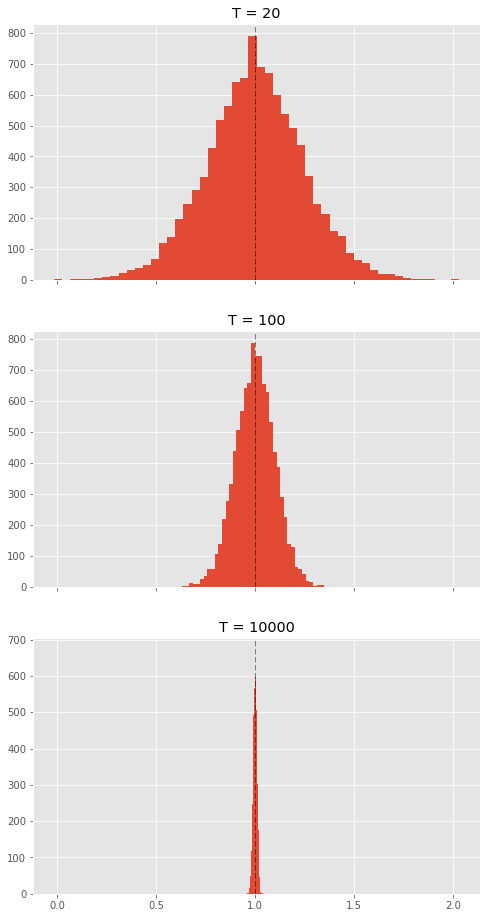

In [4]:
T = [20, 100, 10000]
fig, ax = plt.subplots(3,1, sharex=True, figsize=(8,16))

for j, t in enumerate(T):
    
    betas = []
    
    for i in range(10000):
        x = sn_draw(t)
        e = sn_draw(t)
        y = x + e

        beta_hat = OLS(y, x)
        betas.append(beta_hat[1])
    
    print 'Mean of Beta:', np.mean(betas)
    print 'S.D. of Beta:', np.std(betas)
    
    print 'Finite Sample::', np.sqrt(1/np.sum(x*x))
    print 'Asymptotic', np.sqrt(1/t)
    
    print '*********\n'
    
    ax[j].hist(betas,bins=50)
    ax[j].set_title('T = ' +  str(t))
    ax[j].axvline(x=1, linewidth=0.5, color='k',linestyle='dashed')

Mean of Beta: 1.00091761592
S.D. of Beta: 0.315774979125
Finite Sample: 0.179975496955
Asymptotic: 0.22360679775
*********

Mean of Beta: 0.999338015832
S.D. of Beta: 0.106731362289
Finite Sample: 0.0870746032602
Asymptotic: 0.1
*********

Mean of Beta: 0.99997955891
S.D. of Beta: 0.00995396343048
Finite Sample: 0.0101095771074
Asymptotic: 0.01
*********



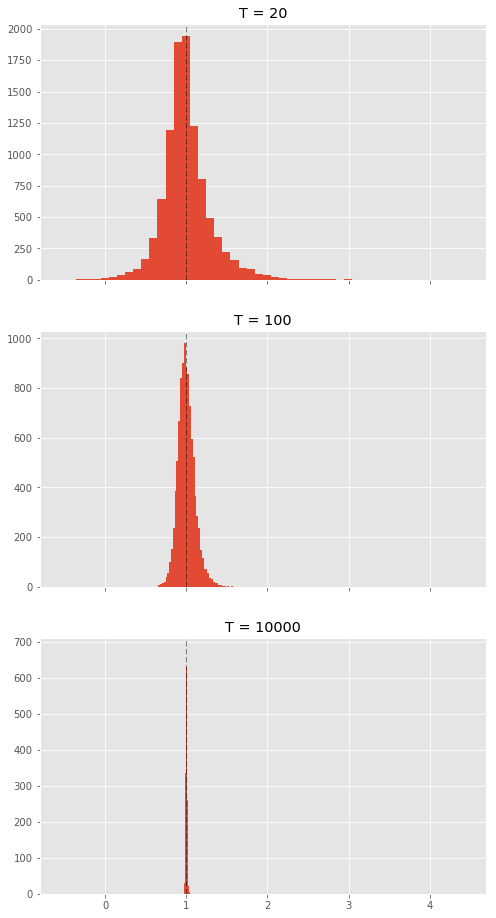

In [5]:
T = [20, 100, 10000]
fig, ax = plt.subplots(3,1, sharex=True, figsize=(8,16))

for j, t in enumerate(T):
    
    betas = []
    
    for i in range(10000):
        x = dm_chi_sq_draw(t)
        e = dm_chi_sq_draw(t)
        y = x + e

        beta_hat = OLS(y, x)
        betas.append(beta_hat[1])        
    
    print 'Mean of Beta:', np.mean(betas)
    print 'S.D. of Beta:', np.std(betas)
    
    print 'Finite Sample:', np.sqrt(2/(np.sum(x*x)))
    print 'Asymptotic:', np.sqrt(1/t) #
    
    print '*********\n'
    
    ax[j].hist(betas,bins=50)
    ax[j].set_title('T = ' +  str(t))
    ax[j].axvline(x=1, linewidth=0.5, color='k',linestyle='dashed')

0.500868812684


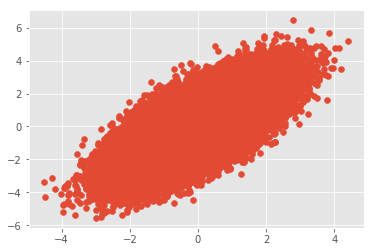

In [6]:
x = sn_draw(100000)
e = sn_draw(100000)
y = x + e

X = sm.add_constant(x)
model = sm.OLS(y,X)
results = model.fit()
print results.rsquared

plt.scatter(x, y)

0.498480309615


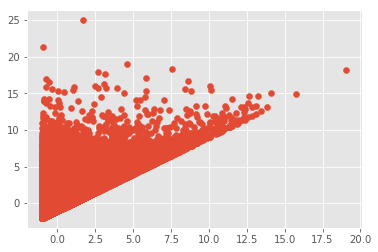

In [7]:
x = dm_chi_sq_draw(100000)
e = dm_chi_sq_draw(100000)
y = x + e

X = sm.add_constant(x)
model = sm.OLS(y,X)
results = model.fit()
print results.rsquared

plt.scatter(x, y)

In [8]:
import scipy.optimize as opt

In [9]:
def U(h,s):
    
    h1, h2 = h,s #h[0], h[1]
    EC_1 = 0.4*np.log(100 + 1.1 * h1 + h2) + \
        0.2*np.log(110 + 1.1 * h1 + 1.15 * h2) + \
        0.4*np.log(110 + 1.1 * h1 + 1.25 * h2)
    
    return -(np.log(100-h1-h2)+0.95*EC_1)

In [10]:
opt_res = opt.minimize(U,(1,-1))
opt_res.x

TypeError: U() takes exactly 2 arguments (1 given)

In [ ]:
print -U([-252.2537134,254.40561692])
print -U([-210.4581,210.3672])
print -U([-63.29,-34.42])
print -U([1775.42, -1777.272])

In [ ]:
D = np.array([[1.98,1.96],[4.1,3.6]])
P = np.array([[1.88],[3.6]])

np.dot(np.linalg.inv(D),P)*2

In [ ]:
V = np.array([[0.06, 0.0377, 0.0259],[.0377,.095,.0285],[.0259,.0285,.07]])
V

In [ ]:
w1 = [.4,.8,-.6]
w2 = [.8,1.6,-1.2]
w3 = [.3,.3,.3]

In [ ]:
np.dot(np.dot(w1,V),np.transpose(w3))